#Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?

# 4.1 Evaluation Metrics: Session Overview

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
-https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

Metric : function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are.

In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [169]:
df =  pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [170]:
#lowercase and replace the space character
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

#convert type of data to numeric and handle the missing value
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

#convert categorical data to binary type 
df.churn = (df.churn == 'yes').astype(int)

In [171]:
# train_test_split
df_full_train, df_test = train_test_split(df,
                                          test_size = 0.2,
                                          random_state = 1)

df_train, df_val = train_test_split(df_full_train,
                                    test_size = 0.25,
                                    random_state = 1)

#define each dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [172]:
df_train.head(2).T

,0,1
customerid,8015-ihcgw,1960-uycnn
gender,female,male
seniorcitizen,0,0
partner,yes,no
dependents,yes,no
tenure,72,10
phoneservice,yes,yes
multiplelines,yes,yes
internetservice,fiber_optic,fiber_optic
onlinesecurity,yes,no


In [173]:
df_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [174]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod'
]

In [175]:
dv = DictVectorizer(sparse = False)

#define features for train data
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

#define model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [176]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [177]:
#define features for valid data
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#model evaluation
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

# 4.2 Accuracy and Dummy Model

- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

### Manual Calculation

In [178]:
len(y_val)

1409

In [179]:
#which one is correct decision 
(y_val == churn_decision).sum()

1132

In [180]:
1132/1409

0.8034066713981547

In [181]:
thresholds = np.linspace(0, 1, 21)

scores = []
# loop
for t in thresholds:
  churn_decision = (y_pred >= t)
  score = (y_val == churn_decision).mean()
  print('%.2f %.3f' % (t,score))
  scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [182]:
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [183]:
scores

[0.2739531582682754,
 0.5088715400993612,
 0.5911994322214337,
 0.6664300922640171,
 0.7097232079489,
 0.7388218594748048,
 0.7601135557132718,
 0.7721788502484032,
 0.7849538679914834,
 0.7934705464868701,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.765791341376863,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

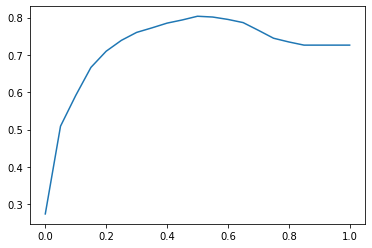

In [184]:
plt.plot(thresholds, scores)

### Sklearn calculation

In [185]:
from sklearn.metrics import accuracy_score

In [186]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [187]:
# replace with the function of sklearn
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
  score = accuracy_score(y_val, y_pred >= t)
  print('%.2f %.3f' % (t,score))
  scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


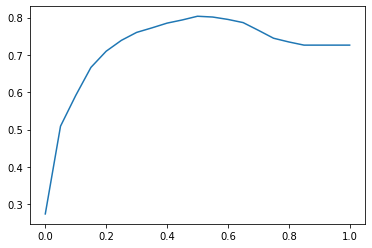

In [188]:
plt.plot(thresholds, scores)

In [189]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [190]:
Counter(y_val)

Counter({0: 1023, 1: 386})

Accuracy is quiet misleading for the class that imbalance.

# 4.3 Confusion Table

- Different types of errors and correct decisions
- Arranging them in a table

In [191]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [192]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [193]:
predict_positive & actual_positive

array([False, False, False, ..., False,  True,  True])

In [194]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [195]:
tp, tn

(210, 922)

In [196]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [197]:
fp, fn

(101, 176)

In [198]:
confusion_matrix = np.array([
     [tn,fp],
     [fn,tp]
 ])
confusion_matrix

array([[922, 101],
       [176, 210]])

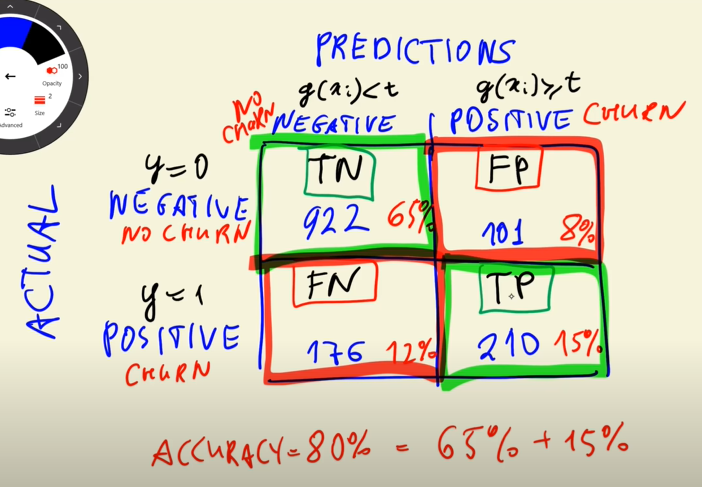

# 4.4 Precision and Recall


In [199]:
acc = (tp + tn) / (tp + tn + fp + fn)

In [200]:
acc

0.8034066713981547

In [201]:
# PRECISION
p = tp / (tp + fp)
p

0.6752411575562701

In [202]:
# we will send the promotional e-mail to :
tp + fp

311

In [203]:
# RECALL
r = tp / (tp + fn)
r

0.5440414507772021

In [204]:
tp + fn

386

# 4.5 ROC Curves

## TRP and FPR

In [205]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [206]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [207]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  scores.append((t, tp, fp, fn, tn))

In [208]:
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [209]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [210]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


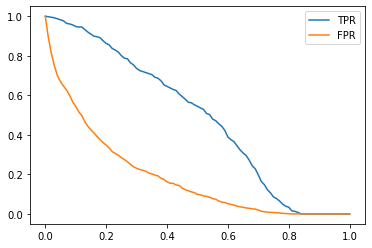

In [211]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

## Random model

In [212]:
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [213]:
(y_rand >= 0.5) == y_val

array([ True,  True, False, ...,  True, False,  True])

In [214]:
def tpr_fpr_dataframe(y_val, y_pred):
  scores = []

  thresholds = np.linspace(0, 1, 101)

  for t in thresholds:
      actual_positive = (y_val == 1)
      actual_negative = (y_val == 0)

      predict_positive = (y_pred >= t)
      predict_negative = (y_pred < t)

      tp = (predict_positive & actual_positive).sum()
      tn = (predict_negative & actual_negative).sum()

      fp = (predict_positive & actual_negative).sum()
      fn = (predict_negative & actual_positive).sum()

      scores.append((t, tp, fp, fn, tn))

  columns = ['threshold','tp','fp','fn','tn']
  df_scores = pd.DataFrame(scores, columns=columns)
  
  df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
  df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

  return df_scores

In [215]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [216]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,354,905,32,118,0.917098,0.884653
20,0.2,319,812,67,211,0.826425,0.793744
30,0.3,278,717,108,306,0.720207,0.700880
40,0.4,240,615,146,408,0.621762,0.601173
50,0.5,204,513,182,510,0.528497,0.501466
60,0.6,171,414,215,609,0.443005,0.404692
70,0.7,121,306,265,717,0.313472,0.299120
80,0.8,93,207,293,816,0.240933,0.202346
90,0.9,60,99,326,924,0.155440,0.096774


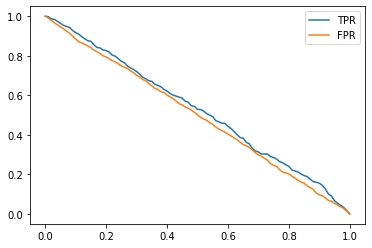

In [217]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

## Ideal model

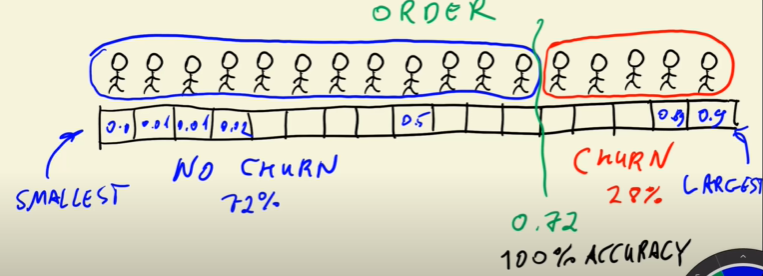

In [218]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [219]:
y_ideal = np.repeat([0, 1],
                    [num_neg, num_pos])

In [220]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [221]:
1 - y_val.mean()

0.7260468417317246

In [222]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [223]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [224]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


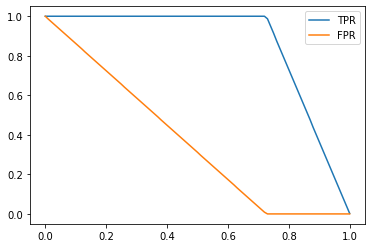

In [225]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

## Putting everything together

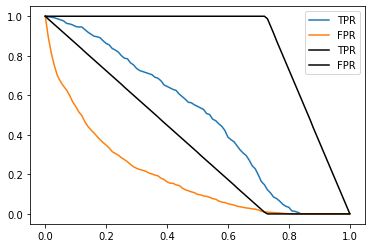

In [226]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')

plt.legend()

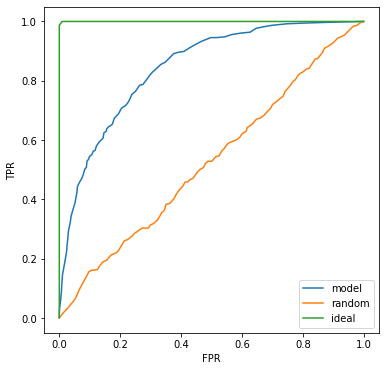

In [227]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# 4.6 ROC AUC

- Area under the ROC curve - useful metric
- Interpretation of AUC

In [228]:
from sklearn.metrics import auc

In [229]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [230]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [231]:
from sklearn.metrics import roc_auc_score

In [232]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

In [233]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [234]:
import random

In [235]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [236]:
pos[pos_ind] > neg[neg_ind]

True

In [237]:
n = 100000
success = 0

for i in range(n):
  pos_ind = random.randint(0, len(pos) - 1)
  neg_ind = random.randint(0, len(neg) - 1)

  if pos[pos_ind] > neg[neg_ind]:
    success = success + 1

success / n

0.84388

In [238]:
n=10000
pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)

In [239]:
pos[pos_ind] > neg[neg_ind]

array([ True,  True,  True, ...,  True, False,  True])

#4.7 Cross-Validation

- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

Parameter tuning : the process of selecting the best parameter.

In [252]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [253]:
dv, model = train(df_train, y_train, C=0.001)

In [254]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [255]:
y_pred = predict(df_val, dv, model)

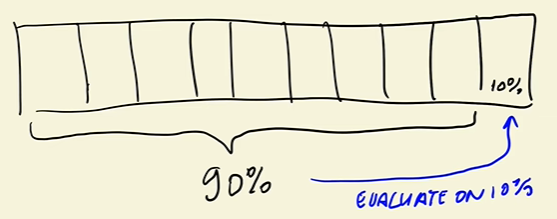

In [256]:
from sklearn.model_selection import KFold

In [257]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [258]:
from tqdm.auto import tqdm

In [259]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.841 +- 0.007
C=1 0.841 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.007


In [260]:
scores

[0.8434622540053849,
 0.8451964143822011,
 0.8333453742725265,
 0.8325745827204707,
 0.8520637883969754]

In [261]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

#4.8 Summary

- Metric - a single number that describes the performance of a model
- Accuracy - fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class inbalance
- ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV - more reliable estimate for performance (mean + std)